# Import Packages

In [189]:
# Import packages
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from copy import deepcopy

In [190]:
logs_df = pd.read_csv("../Data Cleaning/cleaned_dataset.csv")
# logs_df = pd.read_csv("cleaned_dataset.csv")
# logs_df = pd.read_csv("cleaned_dataset_all.csv")
logs_df

,RXASP,RXHEP,FDEAD,FDENNIS,FRECOVER,RXHEP_1,TREATMENT,REWARD_BERNOULLI,REWARD_CATEGORICAL,REWARD_VALUE (BER),REWARD_VALUE (CAT)
0,N,L,N,N,Y,L,2,Alive,Alive and recovered,1,0.274168
1,Y,N,Y,NaN,NaN,N,3,Dead,Dead,0,0.419251
2,Y,N,N,Y,N,N,3,Alive,Alive and still dependent,1,0.301196
3,N,N,N,N,N,N,1,Alive,Alive and recovered,1,0.274168
4,N,L,N,N,Y,L,2,Alive,Alive and recovered,1,0.274168
...,...,...,...,...,...,...,...,...,...,...,...
2495,Y,N,N,Y,N,N,3,Alive,Alive and still dependent,1,0.301196
2496,Y,L,N,N,N,L,4,Alive,Alive and recovered,1,0.274168
2497,Y,N,Y,NaN,NaN,N,3,Dead,Dead,0,0.419251
2498,N,N,N,Y,N,N,1,Alive,Alive and still dependent,1,0.301196


In [191]:
logs_df_1 = sum(logs_df[logs_df["TREATMENT"] == 1]["REWARD_VALUE (BER)"]) / logs_df["TREATMENT"].value_counts()[1]
logs_df_2 = sum(logs_df[logs_df["TREATMENT"] == 2]["REWARD_VALUE (BER)"]) / logs_df["TREATMENT"].value_counts()[2]
logs_df_3 = sum(logs_df[logs_df["TREATMENT"] == 3]["REWARD_VALUE (BER)"]) / logs_df["TREATMENT"].value_counts()[3]
logs_df_4 = sum(logs_df[logs_df["TREATMENT"] == 4]["REWARD_VALUE (BER)"]) / logs_df["TREATMENT"].value_counts()[4]
print(logs_df_1)
print(logs_df_2)
print(logs_df_3)
print(logs_df_4)

0.7752126366950183
0.7557603686635944
0.7579462102689487
0.7952941176470588


In [192]:
logs_df_1 = sum(logs_df[logs_df["TREATMENT"] == 1]["REWARD_VALUE (CAT)"]) / logs_df["TREATMENT"].value_counts()[1]
logs_df_2 = sum(logs_df[logs_df["TREATMENT"] == 2]["REWARD_VALUE (CAT)"]) / logs_df["TREATMENT"].value_counts()[2]
logs_df_3 = sum(logs_df[logs_df["TREATMENT"] == 3]["REWARD_VALUE (CAT)"]) / logs_df["TREATMENT"].value_counts()[3]
logs_df_4 = sum(logs_df[logs_df["TREATMENT"] == 4]["REWARD_VALUE (CAT)"]) / logs_df["TREATMENT"].value_counts()[4]
print(logs_df_1)
print(logs_df_2)
print(logs_df_3)
print(logs_df_4)

def get_reward_prob(df):
    rewards_list = ['Alive and still dependent', 'Alive and recovered', 'Dead', 'Alive with unknown status']
    probs_list = []
    for i in range(4):
        prob = sum(df[df["REWARD_CATEGORICAL"] == rewards_list[i]]["REWARD_VALUE (CAT)"]) / df["REWARD_CATEGORICAL"].value_counts()[i]
        probs_list.append(prob)
    probs_list = [x/sum(probs_list) for x in probs_list]
    return probs_list

treatment_1 = logs_df[logs_df["TREATMENT"] == 1]
treatment_2 = logs_df[logs_df["TREATMENT"] == 2]
treatment_3 = logs_df[logs_df["TREATMENT"] == 3]
treatment_4 = logs_df[logs_df["TREATMENT"] == 4]

treatment_1_probs = get_reward_prob(treatment_1)
treatment_2_probs = get_reward_prob(treatment_2)
treatment_3_probs = get_reward_prob(treatment_3)
treatment_4_probs = get_reward_prob(treatment_4)

print(treatment_1_probs)
print(treatment_2_probs)
print(treatment_3_probs)
print(treatment_4_probs)

0.3149070322566784
0.31826631902629327
0.3193672073373163
0.3137916855760045
[0.3011960855382383, 0.27416765908973245, 0.4192512815202197, 0.005384973851809618]
[0.2869494438055573, 0.288144929437425, 0.4195172369042279, 0.0053883898527898365]
[0.3011960855382383, 0.27416765908973256, 0.41925128152021957, 0.005384973851809618]
[0.29254974576639703, 0.2825808130649381, 0.4194815101990829, 0.005387930969581846]


# Arms

In [193]:
# Define the BernoulliArm class
class BernoulliArm():
    def __init__(self, p):
        self.p = p
        
    def draw(self):
        if random.random() > self.p:
            return 0.0
        else:
            return 1.0

In [194]:
# Define the CategoricalArm class
class CategoricalArm():
    def __init__(self, p):
        self.p = p
        
    def draw(self):
        probabilities = self.p
        rewards_list = ['Dead','Alive and still dependent','Alive and recovered', 'Alive with unknown status']
        category = np.random.choice(4, p=probabilities)
        reward = rewards_list[category]
        return reward

# Algorithms
* Epsilon Greedy
* Softmax

## Epsilon Greedy

In [195]:
# Implement the EpsilonGreedy class
class EpsilonGreedy():
    
    def __init__(self, epsilon, counts, values): 
        self.epsilon = epsilon
        self.counts = counts
        self.values = values
        return 
    
    def initialize(self, n_arms):
        self.counts = [0 for item in range(n_arms)]
        self.values = [0.0 for item in range(n_arms)]
        return
    
    def select_arm(self):
        if random.random() > self.epsilon:
            m = max(self.values)
            return self.values.index(m)
        else:
            return random.randrange(len(self.values))
        
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value
        return

In [196]:
# Implement the EpsilonGreedyCat class
class EpsilonGreedyCategorical():
    
    def __init__(self, epsilon, counts, values, total): 
        self.epsilon = epsilon
        self.counts = counts
        #[{"reward1": count1, "reward2": count2}, {..}]
        self.values = values
        #["reward1", "reward3, ...]
        self.total = total
        return 
    
    def initialize(self, n_arms):
        keyList = ['Dead','Alive and still dependent','Alive and recovered', 'Alive with unknown status']
        arm_dict = dict(zip(keyList, [0]*len(keyList)))
        self.counts = [arm_dict for item in range(n_arms)]
        self.values = ['' for item in range(n_arms)]
        self.total = [0 for item in range(n_arms)]
        return
    
    def select_arm(self):
        if random.random() > self.epsilon:
            m = max(self.total)
            return self.total.index(m)
        else:
            return random.randrange(len(self.values))
        
    def update(self, chosen_arm, reward):
        self.total[chosen_arm] = self.total[chosen_arm] + 1
        indv_dict = self.counts[chosen_arm]
        indv_dict[reward] += 1
        sum_values = self.total[chosen_arm]
        new_dict = indv_dict
        for x, y in new_dict.items():
            new_dict[x] = y/sum_values
        max_reward = max(new_dict, key=new_dict.get)
        self.values[chosen_arm] = max_reward
        return

## Softmax

In [197]:
class Softmax():
    
    def __init__(self, temperature, counts, values):
        self.temperature = temperature
        self.counts = counts
        self.values = values
        return
    
    def initialize(self, n_arms):
        self.counts = [0 for item in range(n_arms)]
        self.values = [0.0 for item in range(n_arms)]
        return
        
    def select_arm(self):
        z=sum([math.exp(v/self.temperature) for v in self.values])
        probs=[math.exp(v/self.temperature)/z for v in self.values]
        current_choice = np.random.choice(n_arms, p=probs)
        return current_choice
    
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm] 
        value = self.values[chosen_arm]
        new_value = ((n-1)/float(n))*value+(1/float(n))*reward
        self.values[chosen_arm] = new_value
        return

In [198]:
class SoftmaxCategorical():
    
    def __init__(self, temperature, counts, values, total):
        self.temperature = temperature
        self.counts = counts
        self.values = values
        self.total = total
        return
    
    def initialize(self, n_arms):
        keyList = ['Dead','Alive and still dependent','Alive and recovered', 'Alive with unknown status']
        arm_dict = dict(zip(keyList, [0]*len(keyList)))
        self.counts = [arm_dict for item in range(n_arms)]
        self.values = ['' for item in range(n_arms)]
        self.total = [0 for item in range(n_arms)]
        return
    
    # HOW WILL THIS WORK
    def select_arm(self):
        z=sum([math.exp(v/self.temperature) for v in self.values])
        probs=[math.exp(v/self.temperature)/z for v in self.values]
        current_choice = np.random.choice(n_arms, p=probs)
        return current_choice
    
    def update(self, chosen_arm, reward):
        self.total[chosen_arm] = self.total[chosen_arm] + 1
        indv_dict = self.counts[chosen_arm]
        indv_dict[reward] += 1
        sum_values = self.total[chosen_arm]
        new_dict = indv_dict
        for x, y in new_dict.items():
            new_dict[x] = y/sum_values
        max_reward = max(new_dict, key=new_dict.get)
        self.values[chosen_arm] = max_reward
        return

# Simulation and Tuning

In [199]:
# Implement Simulation Test
def test_algorithm(algo, arms, n_sims, horizon):
    chosen_arms = [0 for i in range(n_sims * horizon)]
    rewards = [0 for i in range(n_sims * horizon)]
    cumulative_rewards = [0 for i in range(n_sims * horizon)]
    sim_rounds = [0 for i in range(n_sims * horizon)]
    time_steps = [0 for i in range(n_sims * horizon)]
    
    for sim in range(n_sims):
        sim = sim + 1
        algo.initialize(len(arms))
        
        for t in range(horizon):
            t = t + 1
            index = (sim-1) * horizon + t - 1
            sim_rounds[index] = sim
            time_steps[index] = t
            
            chosen_arm = algo.select_arm()
            chosen_arms[index] = chosen_arm
            reward = arms[chosen_arm].draw()
            rewards[index] = reward
            
            if t == 1:
                cumulative_rewards[index] = reward
            else:
                cumulative_rewards[index] = cumulative_rewards[index - 1] + reward 
            
            algo.update(chosen_arm, reward)

    return (sim_rounds, time_steps, chosen_arms, rewards, cumulative_rewards)

In [ ]:
# Implement Simulation Test
def test_algorithm_categorical(algo, arms, n_sims, horizon):
    chosen_arms = [0 for i in range(n_sims * horizon)]
    rewards = ['' for i in range(n_sims * horizon)]

    reward_categories = ['Dead','Alive and still dependent','Alive and recovered', 'Alive with unknown status']
    reward_values = {'Dead': -2,'Alive and still dependent': -1,'Alive with unknown status': 1, 'Alive and recovered': 2}
    cum_rewards = {category: 0 for category in reward_categories}
    cumulative_rewards = [cum_rewards for i in range(n_sims * horizon)]
    
    sim_rounds = [0 for i in range(n_sims * horizon)]
    time_steps = [0 for i in range(n_sims * horizon)]
    
    for sim in range(n_sims):
        sim = sim + 1
        algo.initialize(len(arms))
        
        for t in range(horizon):
            t = t + 1
            index = (sim-1) * horizon + t - 1
            sim_rounds[index] = sim
            time_steps[index] = t
            
            chosen_arm = algo.select_arm()
            chosen_arms[index] = chosen_arm
            reward = arms[chosen_arm].draw()
            rewards[index] = reward_values[reward]

            if t == 1:
                cum_rewards_new = deepcopy(cum_rewards)
                cum_rewards_new[reward] = reward_values[reward]
                cumulative_rewards[index] = cum_rewards_new
            else:
                prev = deepcopy(cumulative_rewards[index - 1])
                prev[reward] = prev[reward] + reward_values[reward]
                cumulative_rewards[index] = prev
            
            algo.update(chosen_arm, reward)

    return (sim_rounds, time_steps, chosen_arms, rewards, cumulative_rewards)

## Initialise for Bernoulli Distribution

In [ ]:
random.seed(4014) # to make sure that I can regenerate the results

# Initialise probabilities
success_probabilities_ber = [0.7, 0.3, 0.4, 0.9]

no_of_treatments = len(success_probabilities_ber)
test_treatments = list(map(lambda mu: BernoulliArm(mu), success_probabilities_ber))

# Number of arms
n_arms = len(success_probabilities_ber)

# Initialise no of simulations
no_of_simulations = 100

# Initialise no of steps (no of patients)
no_of_steps = 2500

# Epsilon values
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Temperature values
tau_values = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.8, 0.9]

# Create all_results dataframe
all_results_epsilon_ber = pd.DataFrame(columns = ["n_sim", "n_step", "chosen_treatment", "rewards", "cumulative_rewards"])
all_results_softmax_ber = pd.DataFrame(columns = ["n_sim", "n_step", "chosen_treatment", "rewards", "cumulative_rewards"])

## Initialise for Categorical Distribution

In [200]:
random.seed(4014) # to make sure that I can regenerate the results

# Initialise probabilities
success_probabilities_cat = [0.4, 0.8, 0.9, 0.3]

treatment_probabilities = [treatment_1_probs, treatment_2_probs, treatment_3_probs, treatment_4_probs]

no_of_treatments_cat = len(treatment_probabilities)
test_treatments_cat = list(map(lambda mu: CategoricalArm(mu), treatment_probabilities))

# Number of arms
n_arms = len(success_probabilities_cat)

# Initialise no of simulations
no_of_simulations = 100

# Initialise no of steps (no of patients)
no_of_steps = 2500

# Epsilon values
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Temperature values
tau_values = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.8, 0.9]

# Create all_results dataframe
all_results_epsilon_cat = pd.DataFrame(columns = ["n_sim", "n_step", "chosen_treatment", "rewards", "cumulative_rewards"])
all_results_softmax_cat = pd.DataFrame(columns = ["n_sim", "n_step", "chosen_treatment", "rewards", "cumulative_rewards"])

## Epsilon Greedy

## Bernoulli Rewards

In [ ]:
# Loop to simulate
for epsilon in epsilon_values:
    eg_algo = EpsilonGreedy(epsilon, [], [])
    eg_algo.initialize(n_arms)
    results_epsilon = pd.DataFrame(test_algorithm(eg_algo, test_treatments, no_of_simulations, no_of_steps)).transpose()
    results_epsilon.columns = ["n_sim", "n_step", "chosen_treatment", "rewards", "cumulative_rewards"]
    results_epsilon["epsilon"] = epsilon
    all_results_epsilon_ber = pd.concat([all_results_epsilon_ber, results_epsilon])

In [ ]:
all_results_epsilon_ber

In [ ]:
# If chosen_treatment = to the treatment with highest click_probability, return 1 else 0
all_results_epsilon_ber['if_best_treatment'] = np.where(all_results_epsilon_ber['chosen_treatment'] == success_probabilities_ber.index(max(success_probabilities_ber)), 1, 0)

# Group by epsilon and n_step,
results_plot_epsilon = all_results_epsilon_ber.groupby(['epsilon', 'n_step'], as_index = False).aggregate({'if_best_treatment': lambda x: x.sum() / float(x.count()), "rewards":"mean", "cumulative_rewards":"mean"})

In [ ]:
results_plot_epsilon

In [ ]:
plt.style.use('ggplot')

# Plot the probability of choosing the best movie
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
for epsilon in results_plot_epsilon['epsilon'].unique():
    results_epsilon = results_plot_epsilon[results_plot_epsilon['epsilon'] == epsilon]
    ax.plot(results_epsilon['n_step'], results_epsilon['if_best_treatment'], label = str(epsilon))

plt.legend() 
plt.title("The probability of choosing the best treatment")

In [ ]:
# plot the rewards at each time step
plt.style.use('ggplot')

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

for epsilon in results_plot_epsilon['epsilon'].unique():
    results_epsilon = results_plot_epsilon[results_plot_epsilon['epsilon'] == epsilon]
    ax.plot(results_epsilon['n_step'], results_epsilon['rewards'],label=str(epsilon))

plt.legend()
plt.title("Average rewards at each time step")

In [ ]:
# Determine the cumulative reward at 1000 time step
results_plot_epsilon[results_plot_epsilon["n_step"] == 3000]

In [ ]:
# Plot the cumulative rewards at each time step
plt.style.use('ggplot')

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

for epsilon in results_plot_epsilon['epsilon'].unique():
    results_epsilon = results_plot_epsilon[results_plot_epsilon['epsilon'] == epsilon]
    ax.plot(results_epsilon['n_step'], results_epsilon['cumulative_rewards'], label = str(epsilon))

plt.legend()
plt.title("Cumulative rewards at each step")

## Categorical Rewards

In [201]:
# Loop to simulate
for epsilon in epsilon_values:
    eg_algo = EpsilonGreedyCategorical(epsilon, [], [], [])
    eg_algo.initialize(n_arms)
    results_epsilon = pd.DataFrame(test_algorithm_categorical(eg_algo, test_treatments_cat, no_of_simulations, no_of_steps)).transpose()
    results_epsilon.columns = ["n_sim", "n_step", "chosen_treatment", "rewards", "cumulative_rewards"]
    results_epsilon["epsilon"] = epsilon
    all_results_epsilon_cat = pd.concat([all_results_epsilon_cat, results_epsilon])

In [202]:
all_results_epsilon_cat

,n_sim,n_step,chosen_treatment,rewards,cumulative_rewards,epsilon
0,1,1,0,-2,"{'Dead': -2, 'Alive and still dependent': 0, '...",0.1
1,1,2,0,-1,"{'Dead': -2, 'Alive and still dependent': -1, ...",0.1
2,1,3,0,-2,"{'Dead': -4, 'Alive and still dependent': -1, ...",0.1
3,1,4,0,-2,"{'Dead': -6, 'Alive and still dependent': -1, ...",0.1
4,1,5,0,-2,"{'Dead': -8, 'Alive and still dependent': -1, ...",0.1
...,...,...,...,...,...,...
249995,100,2496,2,-2,"{'Dead': -1442, 'Alive and still dependent': -...",0.9
249996,100,2497,3,-1,"{'Dead': -1442, 'Alive and still dependent': -...",0.9
249997,100,2498,2,-1,"{'Dead': -1442, 'Alive and still dependent': -...",0.9
249998,100,2499,0,-1,"{'Dead': -1442, 'Alive and still dependent': -...",0.9


In [203]:
all_results_epsilon_cat_new = all_results_epsilon_cat
all_results_epsilon_cat_new['combined_cum_rewards'] = all_results_epsilon_cat_new['cumulative_rewards'].apply(lambda x: sum(x.values()))
all_results_epsilon_cat_new

,n_sim,n_step,chosen_treatment,rewards,cumulative_rewards,epsilon,combined_cum_rewards
0,1,1,0,-2,"{'Dead': -2, 'Alive and still dependent': 0, '...",0.1,-2
1,1,2,0,-1,"{'Dead': -2, 'Alive and still dependent': -1, ...",0.1,-3
2,1,3,0,-2,"{'Dead': -4, 'Alive and still dependent': -1, ...",0.1,-5
3,1,4,0,-2,"{'Dead': -6, 'Alive and still dependent': -1, ...",0.1,-7
4,1,5,0,-2,"{'Dead': -8, 'Alive and still dependent': -1, ...",0.1,-9
...,...,...,...,...,...,...,...
249995,100,2496,2,-2,"{'Dead': -1442, 'Alive and still dependent': -...",0.9,35
249996,100,2497,3,-1,"{'Dead': -1442, 'Alive and still dependent': -...",0.9,34
249997,100,2498,2,-1,"{'Dead': -1442, 'Alive and still dependent': -...",0.9,33
249998,100,2499,0,-1,"{'Dead': -1442, 'Alive and still dependent': -...",0.9,32


In [204]:
# If chosen_treatment = to the treatment with highest click_probability, return 1 else 0
all_results_epsilon_cat_new['if_best_treatment'] = np.where(all_results_epsilon_cat_new['chosen_treatment'] == success_probabilities_cat.index(max(success_probabilities_cat)), 1, 0)

# Group by epsilon and n_step,
results_plot_epsilon_cat_new = all_results_epsilon_cat_new.groupby(['epsilon', 'n_step'], as_index = False).aggregate({'if_best_treatment': lambda x: x.sum() / float(x.count()), "rewards":"mean", "combined_cum_rewards":"mean"})

In [205]:
results_plot_epsilon_cat_new

,epsilon,n_step,if_best_treatment,rewards,combined_cum_rewards
0,0.1,1,0.01,0.08,0.08
1,0.1,2,0.01,0.11,0.19
2,0.1,3,0.02,-0.25,-0.06
3,0.1,4,0.04,0.02,-0.04
4,0.1,5,0.05,-0.30,-0.34
...,...,...,...,...,...
22495,0.9,2496,0.22,-0.32,-76.42
22496,0.9,2497,0.25,-0.06,-76.48
22497,0.9,2498,0.23,0.10,-76.38
22498,0.9,2499,0.34,-0.28,-76.66


Text(0.5, 1.0, 'The probability of choosing the best treatment')

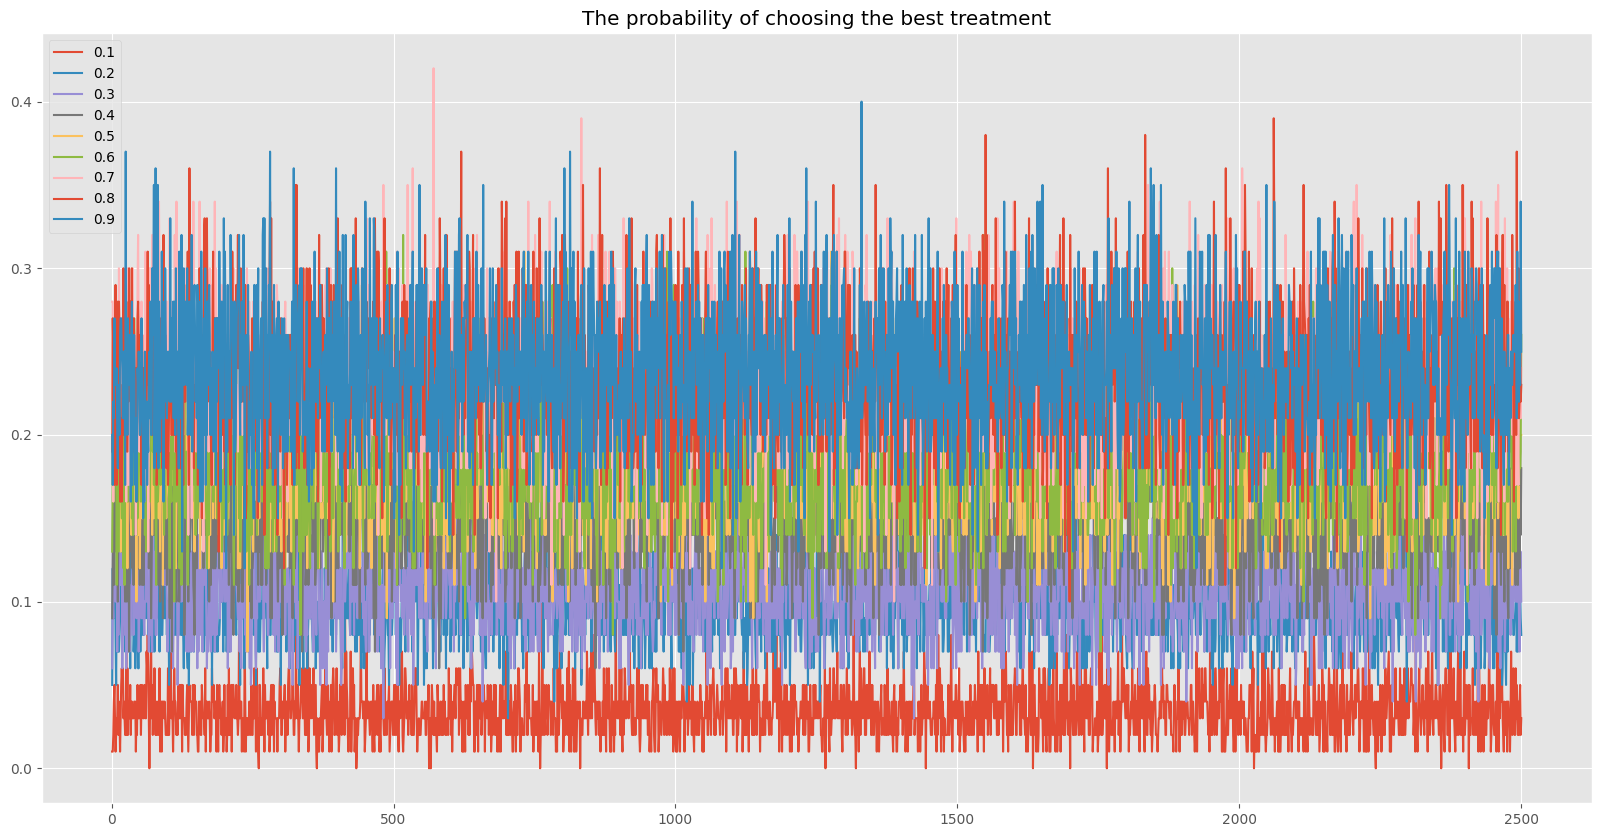

In [206]:
plt.style.use('ggplot')

# Plot the probability of choosing the best movie
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
for epsilon in results_plot_epsilon_cat_new['epsilon'].unique():
    results_epsilon_cat = results_plot_epsilon_cat_new[results_plot_epsilon_cat_new['epsilon'] == epsilon]
    ax.plot(results_epsilon_cat['n_step'], results_epsilon_cat['if_best_treatment'], label = str(epsilon))

plt.legend() 
plt.title("The probability of choosing the best treatment")

Text(0.5, 1.0, 'Average rewards at each time step')

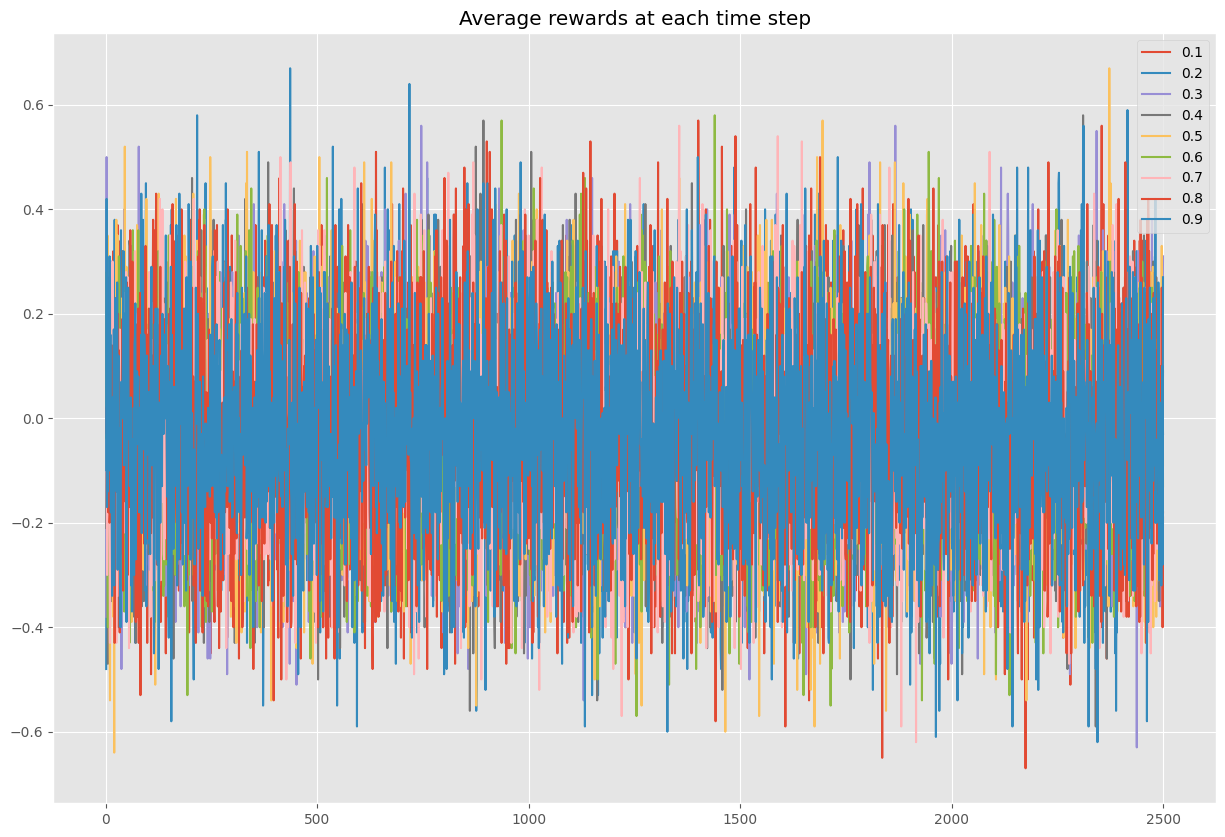

In [207]:
# plot the rewards at each time step
plt.style.use('ggplot')

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

for epsilon in results_plot_epsilon_cat_new['epsilon'].unique():
    results_epsilon_cat = results_plot_epsilon_cat_new[results_plot_epsilon_cat_new['epsilon'] == epsilon]
    ax.plot(results_epsilon_cat['n_step'], results_epsilon_cat['rewards'],label=str(epsilon))

plt.legend()
plt.title("Average rewards at each time step")

In [208]:
# Determine the cumulative reward at 1000 time step
results_plot_epsilon[results_plot_epsilon["n_step"] == 3000]

,epsilon,n_step,if_best_treatment,rewards,cumulative_rewards


Text(0.5, 1.0, 'Cumulative rewards at each step')

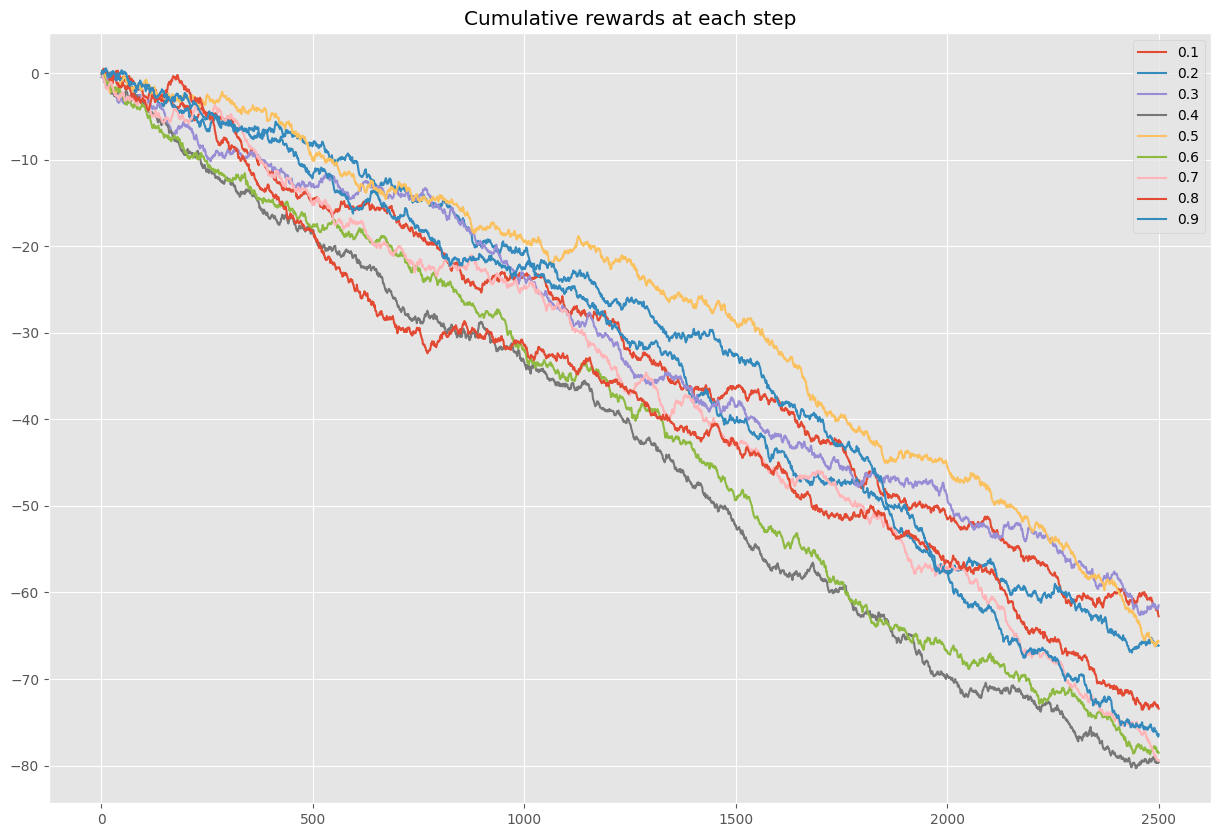

In [209]:
# Plot the cumulative rewards at each time step
plt.style.use('ggplot')

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

for epsilon in results_plot_epsilon_cat_new['epsilon'].unique():
    results_epsilon_cat = results_plot_epsilon_cat_new[results_plot_epsilon_cat_new['epsilon'] == epsilon]
    ax.plot(results_epsilon_cat['n_step'], results_epsilon_cat['combined_cum_rewards'], label = str(epsilon))

plt.legend()
plt.title("Cumulative rewards at each step")

## Softmax

In [ ]:
for temperature in tau_values:
    algo = Softmax(temperature, [], [])
    algo.initialize(n_arms)
    results_softmax = pd.DataFrame(test_algorithm(algo, test_treatments, no_of_simulations, no_of_steps)).transpose()
    results_softmax.columns=['n_sim','n_step','chosen_treatment','rewards','cumulative_rewards']
    results_softmax['temperature'] = temperature
    all_results_softmax_ber = pd.concat([all_results_softmax_ber, results_softmax])

In [ ]:
all_results_softmax_ber

In [ ]:
# If chosen_treatment = to the treatment with highest click_probability, return 1 else 0
all_results_softmax_ber['if_best_treatment'] = np.where(all_results_softmax_ber['chosen_treatment'] == success_probabilities.index(max(success_probabilities)), 1, 0)

# Group by epsilon and n_step,
results_plot_softmax = all_results_softmax_ber.groupby(['temperature', 'n_step'], as_index = False).aggregate({'if_best_treatment': lambda x: x.sum() / float(x.count()), "rewards":"mean", "cumulative_rewards":"mean"})

In [ ]:
results_plot_softmax

In [ ]:
plt.style.use('ggplot')

# Plot the probability of choosing the best movie
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)

for tau in results_plot_softmax['temperature'].unique():
    results_softmax = results_plot_softmax[results_plot_softmax['temperature'] == tau]
    ax.plot(results_softmax['n_step'], results_softmax['if_best_treatment'], label = str(tau))

plt.legend() 
plt.title("The probability of choosing the best treatment")

In [ ]:
# plot the rewards at each time step
plt.style.use('ggplot')

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

for epsilon in results_plot_softmax['temperature'].unique():
    results_softmax = results_plot_softmax[results_plot_softmax['temperature'] == epsilon]
    ax.plot(results_softmax['n_step'], results_softmax['rewards'],label=str(epsilon))

plt.legend()
plt.title("Average rewards at each time step")

In [ ]:
# Determine the cumulative reward at 1000 time step
results_plot_softmax[results_plot_softmax["n_step"] == 3000]

In [ ]:
# Plot the cumulative rewards at each time step
plt.style.use('ggplot')

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

for tau in results_plot_softmax['temperature'].unique():
    results_softmax = results_plot_softmax[results_plot_softmax['temperature'] == tau]
    ax.plot(results_softmax['n_step'], results_softmax['cumulative_rewards'], label = str(tau))

plt.legend()
plt.title("Cumulative rewards at each step")